<a href="https://colab.research.google.com/github/bnv20/cakd3/blob/main/dl_recurrent_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[활성화 함수] https://bbangko.tistory.com/5

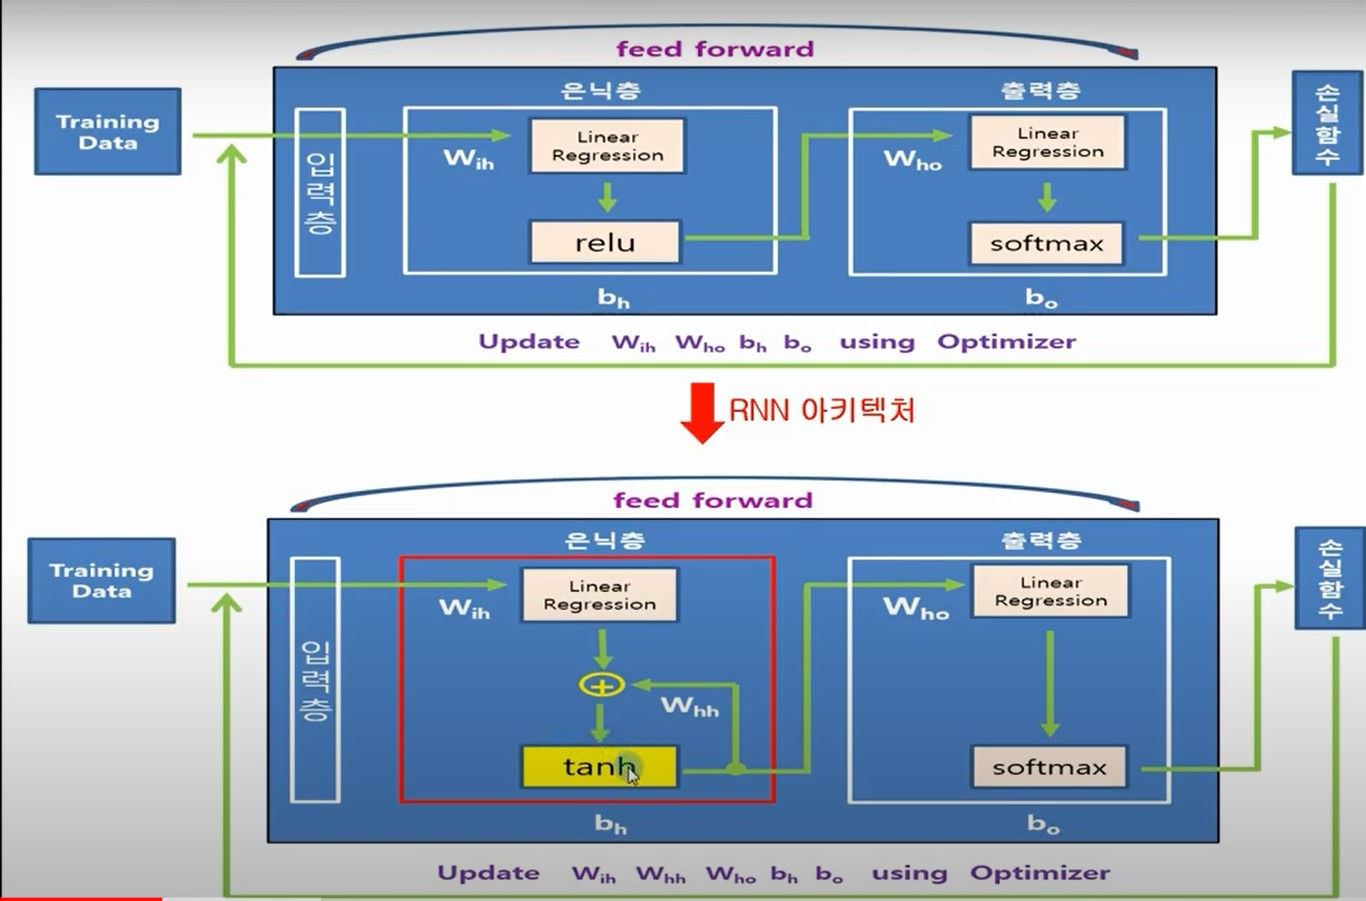

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/cakd3_colab/dl_keras/rnn1.jpg')

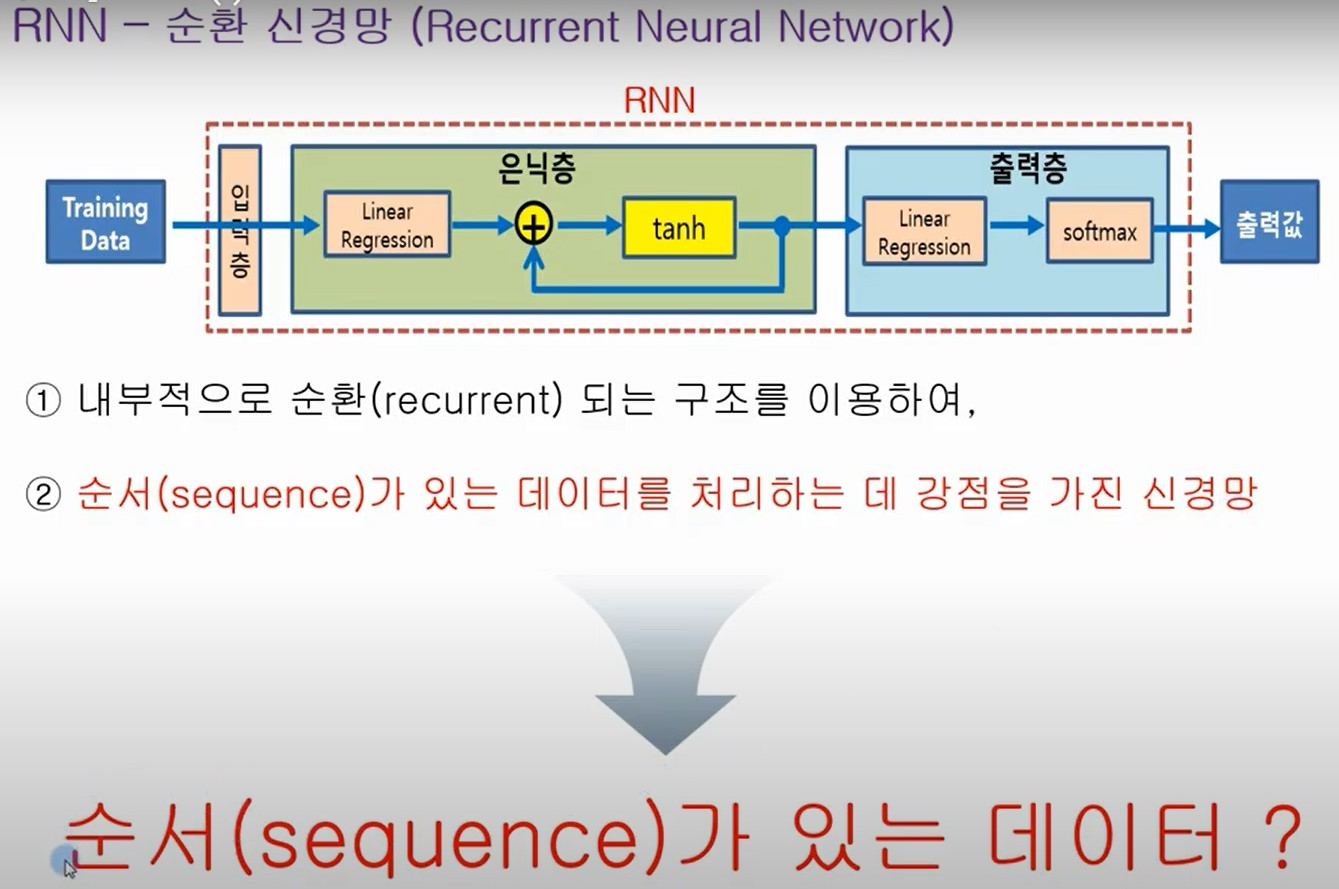

In [1]:
from IPython.display import Image
Image('/content/drive/MyDrive/cakd3_colab/dl_keras/rnn2.jpg')

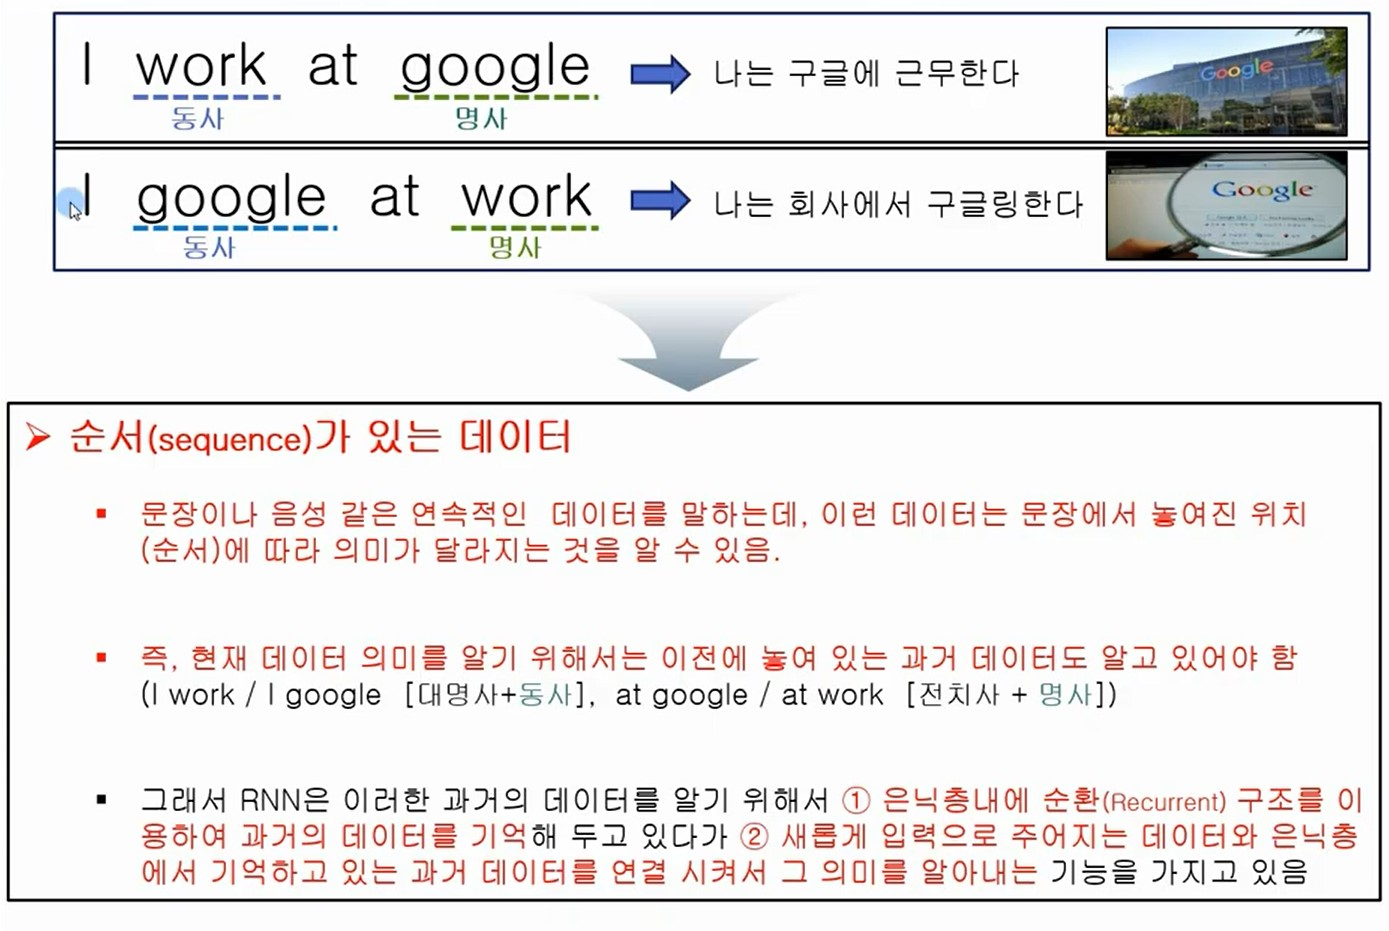

In [2]:
from IPython.display import Image 
Image('/content/drive/MyDrive/cakd3_colab/dl_keras/rnn3.jpg')

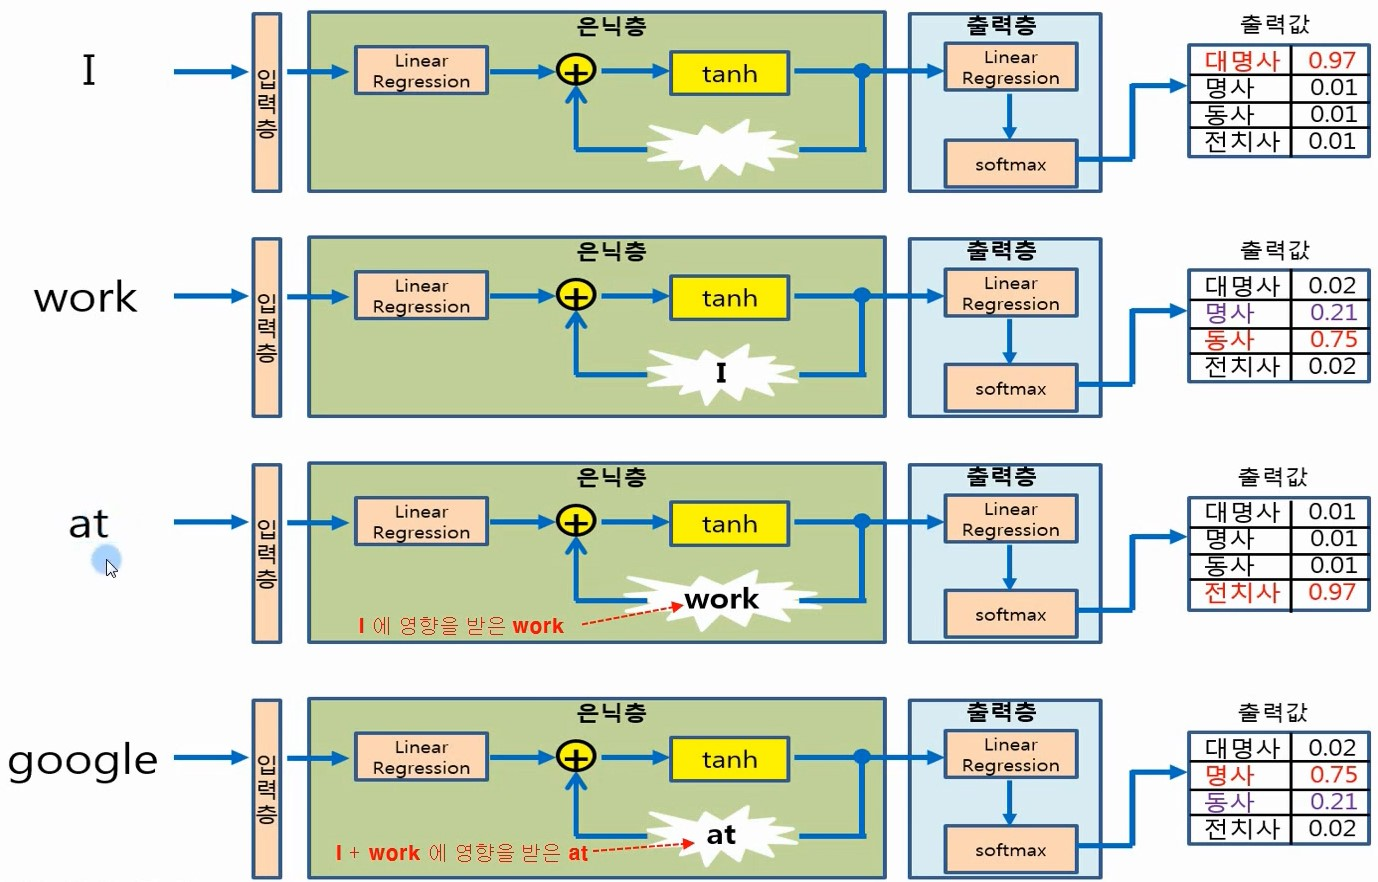

In [3]:
from IPython.display import Image 
Image('/content/drive/MyDrive/cakd3_colab/dl_keras/rnn4.jpg')

In [9]:
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32)) # (batch_size, output_features)
model.summary()



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [10]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True)) # (batch_size, timesteps, output_features)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [12]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True)) # (batch_size, timesteps, output_features)
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_13 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_14 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_15 (SimpleRNN)    (None, None, 32)          2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [13]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence 

max_features = 10000
maxlen = 500
batch_size = 32

(input_train,y_train),(input_test,y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), ' 테스트 시퀀스')

print('시퀀스 패딩')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print(input_train.shape)
print(input_test.shape)

17473536/17464789 [==============================] - 0s 0us/step
25000 훈련 시퀀스
25000  테스트 시퀀스
시퀀스 패딩
(25000, 500)
(25000, 500)


In [14]:
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 29s 175ms/step - loss: 0.6528 - acc: 0.6003 - val_loss: 0.5572 - val_acc: 0.7062
Epoch 2/10
157/157 [==============================] - 26s 164ms/step - loss: 0.4284 - acc: 0.8129 - val_loss: 0.4301 - val_acc: 0.8096
Epoch 3/10
157/157 [==============================] - 26s 167ms/step - loss: 0.3012 - acc: 0.8791 - val_loss: 0.3801 - val_acc: 0.8374
Epoch 4/10
157/157 [==============================] - 27s 170ms/step - loss: 0.2542 - acc: 0.9015 - val_loss: 0.3677 - val_acc: 0.8552
Epoch 5/10
157/157 [==============================] - 27s 171ms/step - loss: 0.1789 - acc: 0.9321 - val_loss: 0.4210 - val_acc: 0.8468
Epoch 6/10
157/157 [==============================] - 26s 167ms/step - loss: 0.1207 - acc: 0.9580 - val_loss: 0.4775 - val_acc: 0.8092
Epoch 7/10
157/157 [==============================] - 26s 166ms/step - loss: 0.0736 - acc: 0.9762 - val_loss: 0.4500 - val_acc: 0.8474
Epoch 8/10
157/157 [==============================] - 2

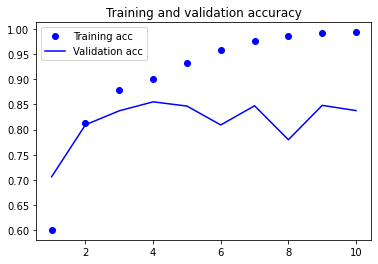

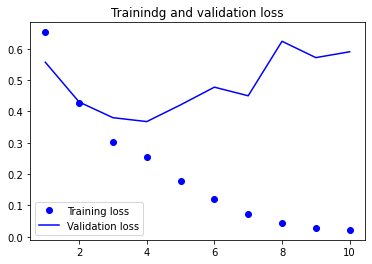

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Trainindg and validation loss')
plt.legend()
plt.show()



DNN 정확도 87% 대비 성능이 높지 않음.
이유로는
- 전체 시퀀스가 아니라 500개 단어만 사용
- SimpleRNN은 이 경우와 같은 긴 시퀀스를 처리하는데는 적합하지 않음. 즉 더 잘 작동하는 고급 순환층을 고려할 필요가 있음

LSTM

- SimpleRNN은 긴 시간에 걸친 의존성은 학습할 수 없다.
- 그래디언트 소실 문제가 발생하기 때문이다.
- LSTM(Long Short-Term Memory) 알고리즘은 정보를 여러 타임스텝에 걸처 나르는 방법을 추가하여 시퀀스 어느 지점에서 추출된 정보가 컨베이어 벨트 위로 올라가 필요한 시점의 타임스탭으로 이동하여 떨군다.
- 개념적으로 데이터를 실어 나르는 이 흐름이 다음 출력과 상태를 조절한다. 

In [17]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train,y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 59s 362ms/step - loss: 0.5228 - acc: 0.7497 - val_loss: 0.3479 - val_acc: 0.8560
Epoch 2/10
157/157 [==============================] - 57s 365ms/step - loss: 0.3071 - acc: 0.8775 - val_loss: 0.2890 - val_acc: 0.8828
Epoch 3/10
157/157 [==============================] - 57s 362ms/step - loss: 0.2481 - acc: 0.9083 - val_loss: 0.3255 - val_acc: 0.8756
Epoch 4/10
157/157 [==============================] - 56s 357ms/step - loss: 0.2052 - acc: 0.9237 - val_loss: 0.3084 - val_acc: 0.8668
Epoch 5/10
157/157 [==============================] - 56s 358ms/step - loss: 0.1777 - acc: 0.9382 - val_loss: 0.3054 - val_acc: 0.8670
Epoch 6/10
157/157 [==============================] - 56s 359ms/step - loss: 0.1651 - acc: 0.9419 - val_loss: 0.2899 - val_acc: 0.8814
Epoch 7/10
157/157 [==============================] - 57s 365ms/step - loss: 0.1457 - acc: 0.9481 - val_loss: 0.3169 - val_acc: 0.8710
Epoch 8/10
157/157 [==============================] - 5

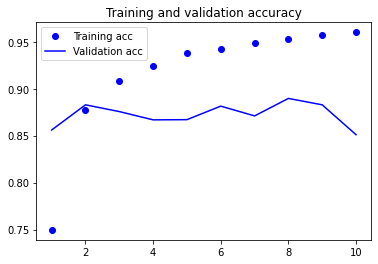

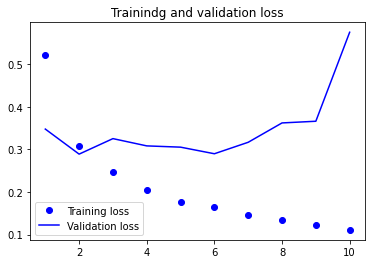

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Trainindg and validation loss')
plt.legend()
plt.show()

LSTM 검증 정확도 88.9%
- SimpleRNN 보다 개선된 이유는 LSTM이 그래디언트 소실 문제로 부터 덜 영향을 받기 때문임

반면 아주 좋은 정확도를 보이지 않는 이유는

- 하이퍼파라미터 튜닝을 전혀 하지 않음
- LSTM은 감성분류 문제에 별 도움이 되지 않음. 왜냐하면 LSTM은 리뷰를 전체적으로 길게 분석하는 일에 적합하며 이런 간단한 문제는 단어 빈도 분석 등의 방법이 더 적합함. 즉 LSTM은 질문-응답, 기계 번역 분야에 더 적합하다고 할 수 있음
